In [1]:
import sys
sys.path.append("../")

##### import library

In [2]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Deep learning (PyTorch and TensorFlow)
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2

# Plotly for interactive visualization
import plotly.graph_objects as go

# Custom utility module
import utility


2025-03-09 11:06:20.254999: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-09 11:06:20.304392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-09 11:06:20.304430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-09 11:06:20.305605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 11:06:20.313144: I tensorflow/core/platform/cpu_feature_guar

##### Define functions 

In [3]:
# Define Himmelblau's function with a single argument
def himmelblau(args):
    x, y = args
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

f = himmelblau


##### Define the function in PyTorch


##### Plot graph

In [4]:
def plot_graph(fig, x, y, z):

    # 3D Surface Plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax1.plot_surface(x, y, z, cmap=cmap, edgecolor="none")
    ax1.set_title("3D Surface Plot", fontsize=10)
    ax1.set_xlabel("X-axis", fontsize=10)
    ax1.set_ylabel("Y-axis", fontsize=10)
    # ax1.set_zlabel("Function Value", fontsize=5)

    # Add colorbar for 3D plot
    cbar1 = fig.colorbar(surf, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.set_label("Function Value", fontsize=10)

    # 2D Contour Plot
    ax2 = fig.add_subplot(1, 2, 2)
    contour = ax2.contourf(x, y, z, levels=50, cmap=cmap)
    ax2.set_xlabel("X-axis", fontsize=10)
    ax2.set_ylabel("Y-axis", fontsize=10)
    ax2.set_title("2D Contour Plot", fontsize=10)

    # Add colorbar for 2D plot without overlapping
    cbar2 = fig.colorbar(contour, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.set_label("Function Value", fontsize=10)

    ax1.tick_params(axis='x', labelsize=10, rotation=0)
    ax1.tick_params(axis='y', labelsize=10)
    ax1.tick_params(axis='both', which='both', width=0.5)

    # Improve layout to avoid overlap
    plt.tight_layout()
    # plt.show()

    return fig, ax1, ax2



##### Initialize class object and grid

In [5]:
obj = utility.CentralDifference()
# Create a grid of x and y values
interval = 1000
max_iters = 1000
min_grid = -5
max_grid = 5
x = np.linspace(min_grid, max_grid, interval)
y = np.linspace(min_grid, max_grid, interval)
x, y = np.meshgrid(x, y)
z = f((x, y))

##### Define colormap

In [6]:
colors = [
    (0.0, "navy"),         # Deep blue for the minimum
    (0.01, "blue"),         # Blue
    (0.2, "cyan"),         # Cyan
    (0.4, "limegreen"),    # Green
    (0.6, "yellow"),       # Yellow
    (0.8, "orange"),       # Orange
    (1.0, "darkred"),      # Deep red for the maximum
]
cmap = LinearSegmentedColormap.from_list("improved_gradient_cmap", colors)

##### Show 3D visualization and contourplot

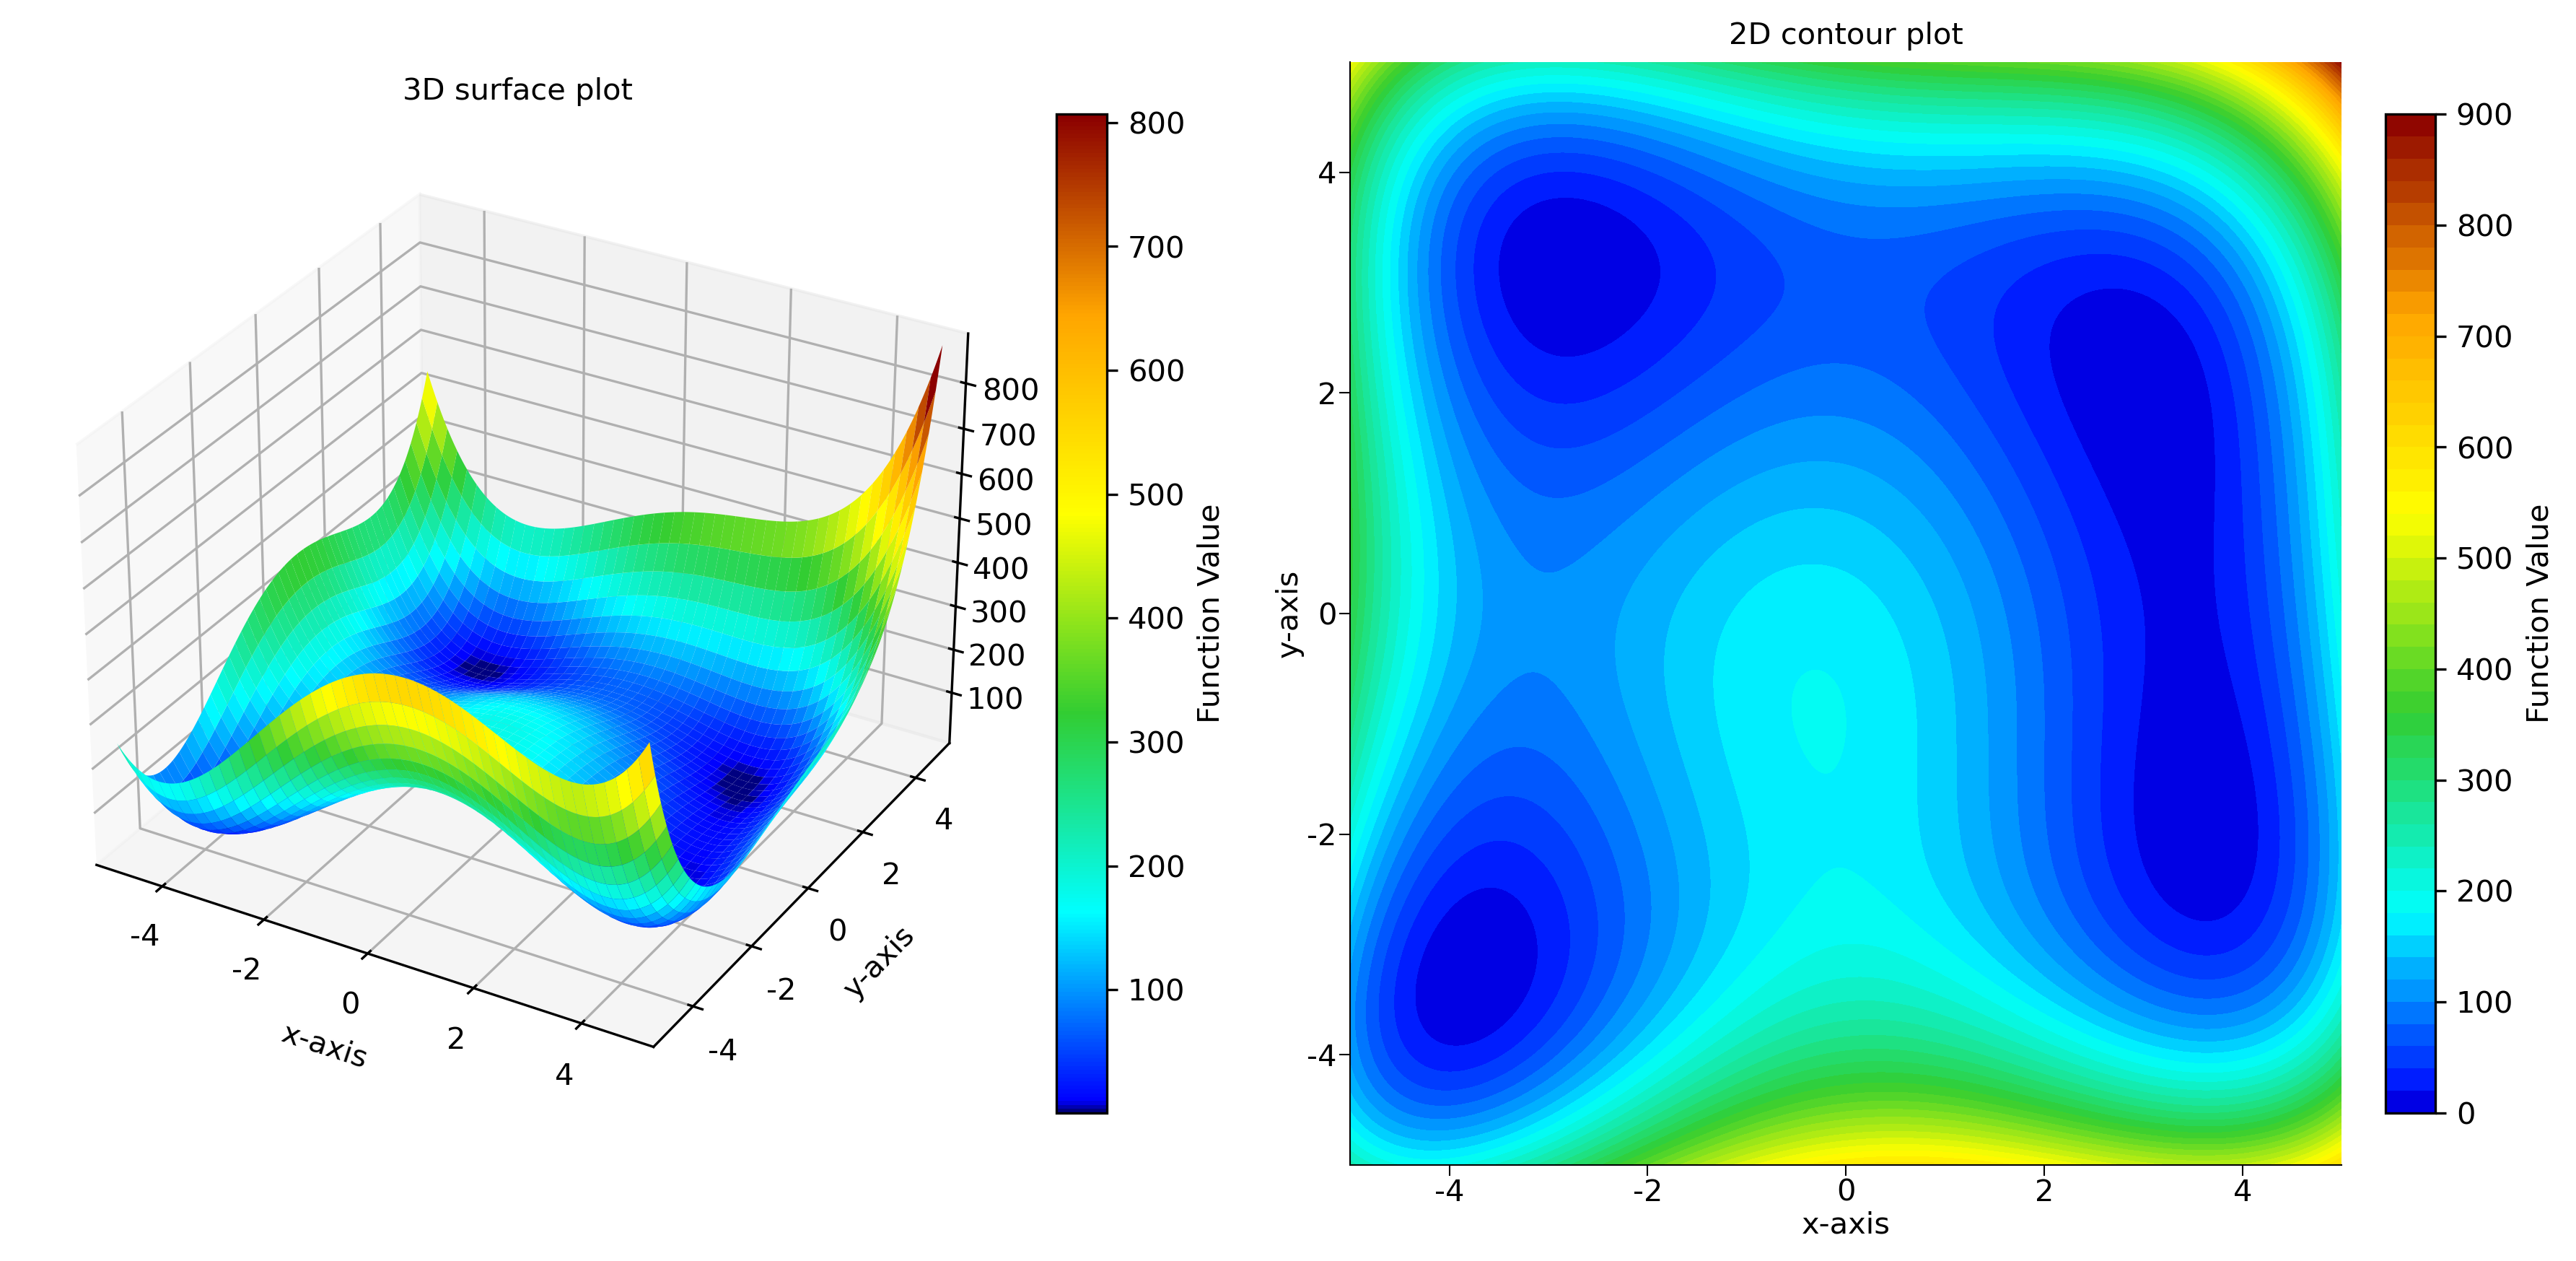

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=300)
fig, ax1, ax2 = plot_graph(fig, x, y, z)

ax1.set_ylabel("y-axis", labelpad=1)
ax1.set_xlabel("x-axis", labelpad=1)
ax1.set_title("3D surface plot", fontsize=10)
ax1 = utility.custom_figure_axis(ax=ax1, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 10)

ax2.set_ylabel("y-axis", labelpad=1)
ax2.set_xlabel("x-axis", labelpad=1)
ax2.set_title("2D contour plot", fontsize=10)
ax2 = utility.custom_figure_axis(ax=ax2, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 10)
ax1.grid()
# plt.savefig("Himmelblau.pdf", dpi = 300, transparent=False, bbox_inches="tight")

##### SHow a dummy example

In [8]:
args = [-0.16210637, -0.11185439]

grad = obj.compute_gradient(args = args, f = f)
print("Gradient:", grad)

Gradient: [ -7.11102005 -18.97229749]


##### Define parametrs and variables

In [9]:
num_samples=5000
dimension=2
batch_size=512

##### Generate synthetic data to model the gradient of function with min and max grid

In [10]:
X_train, X_test, y_train, y_test = obj.generate_random_data(f=f, num_samples=num_samples, dimension=dimension, value_range=(min_grid,max_grid))

##### Define model architecture

In [11]:
model = Sequential([
    Dense(128, input_shape=(dimension,), activation='leaky_relu'),
    Dense(64, activation='leaky_relu'),
    # Dense(8, activation='leaky_relu'),
    Dense(dimension)
])


model.compile(loss='mse', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

epochs = 2000

history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/2000


2025-03-09 11:06:24.740613: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


7/7 [==============================] - 1s 34ms/step - loss: 12687.2139 - val_loss: 13145.2012
Epoch 2/2000
7/7 [==============================] - 0s 8ms/step - loss: 12552.7627 - val_loss: 13005.0576
Epoch 3/2000
7/7 [==============================] - 0s 10ms/step - loss: 12412.3916 - val_loss: 12851.0674
Epoch 4/2000
7/7 [==============================] - 0s 11ms/step - loss: 12253.7383 - val_loss: 12671.4023
Epoch 5/2000
7/7 [==============================] - 0s 12ms/step - loss: 12067.9922 - val_loss: 12460.6572
Epoch 6/2000
7/7 [==============================] - 0s 8ms/step - loss: 11845.1650 - val_loss: 12207.2197
Epoch 7/2000
7/7 [==============================] - 0s 10ms/step - loss: 11576.9473 - val_loss: 11907.1240
Epoch 8/2000
7/7 [==============================] - 0s 12ms/step - loss: 11264.6992 - val_loss: 11557.0625
Epoch 9/2000
7/7 [==============================] - 0s 11ms/step - loss: 10896.7988 - val_loss: 11156.9648
Epoch 10/2000
7/7 [==============================] -

##### Define loss curve

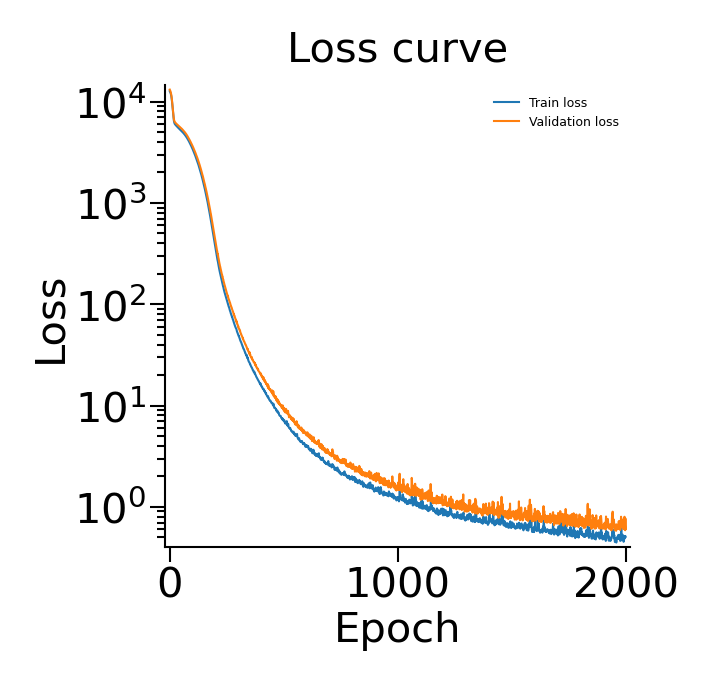

In [46]:
ax = obj.plot_convergence(history)
# ax = utility.custom_figure_axis(ax, fontsize=4, rotation = 0)
ax.set_ylabel("Loss", labelpad=1)
ax.set_xlabel("Epoch", labelpad=1)
ax.set_title("Loss curve", fontsize=10)

ax = utility.custom_figure_axis(ax, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 10)
ax.set_yscale("log")
plt.savefig("himmelblau_loss.pdf", dpi = 300, transparent=False, bbox_inches="tight")

##### Test data performance

In [13]:
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

32/32 [==============================] - 0s 2ms/step - loss: 0.6213
Test loss: 0.6212896108627319


##### Define torch optimizer

In [14]:
import numpy as np
import torch
import torch.optim as optim

def torch_optimization(args, lr, num_steps, f, tol=1e-5, patience=100):
    """
    Performs optimization using PyTorch's Adam optimizer with early stopping 
    when loss difference is below a threshold for a given number of epochs.

    Parameters:
    args (tuple): Initial values (x, y).
    lr (float): Learning rate.
    num_steps (int): Maximum number of optimization steps.
    f (function): Function to be minimized.
    tol (float): Threshold for stopping when loss difference is small.
    patience (int): Number of consecutive epochs with small loss change before stopping.

    Returns:
    np.array: Optimized values of (x, y).
    list: List of function values (loss) at each epoch.
    """

    x = torch.tensor(args[0], dtype=torch.float32, requires_grad=True)
    y = torch.tensor(args[1], dtype=torch.float32, requires_grad=True)

    optimizer = optim.Adam([x, y], lr=lr)

    function_values = []  # Store f(x, y) values at each epoch
    stable_count = 0  # Counter for consecutive small changes

    for step in range(num_steps):
        optimizer.zero_grad()
        
        loss = f((x, y))  # Compute function value
        function_values.append(loss.item())  # Store function value
        
        loss.backward()  # Compute gradients
        optimizer.step()  # Update parameters

        # Check for early stopping
        if step > 0:
            loss_diff = abs(function_values[-1] - function_values[-2])
            if loss_diff < tol:
                stable_count += 1
            else:
                stable_count = 0  # Reset if loss difference is significant

            if stable_count >= patience:
                print(f"Early stopping at step {step} (loss change < {tol} for {patience} consecutive epochs)")
                break

    return np.array([x.item(), y.item()]), function_values


##### Run 10000 iteration to optimize funtion from [-5,5] with step size of 1 with various method

In [15]:
lr = 0.001
max_iters = 10000

##### Store the result of central differentiation

In [16]:
import importlib
importlib.reload(utility)

<module 'utility' from '/home/abhishekh/GD/Himmelblau/../utility.py'>

In [17]:

c = 0

df_cd = pd.DataFrame(columns =["X_start",  "y_start", "X_gd_cd", "y_gd_cd"])

for i in list(range(-5, 6, 1)):
    for j in list(range(-5, 6, 1)):

        print(f"currently running for x = {i} and y = {j}")
        x0 = np.array([i*1.0, j*1.0])
        X_gd, y_gd, history_gd = obj.optimize_function_with_central_difference(f=f, x0=x0, learning_rate=lr, max_iters=max_iters, tol=1e-5, patience =100)
        df_cd.loc[c, ["X_gd_cd", "y_gd_cd"]] = X_gd, y_gd
        df_cd.loc[c, "y_start"] = f(x0)
        df_cd.loc[c, "X_start"] = x0


        c = c + 1

        X_gd, y_gd, x0 =  [None] * 3


currently running for x = -5 and y = -5
Early stopping at iteration 191 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = -4
Early stopping at iteration 187 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = -3
Early stopping at iteration 169 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = -2
Early stopping at iteration 194 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = -1
Early stopping at iteration 220 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = 0
Early stopping at iteration 285 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = 1
Early stopping at iteration 216 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = 2
Early stopping at iteration 198 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = 3
Earl

##### store result for proposed method

In [18]:
c = 0


df_proposed = pd.DataFrame(columns =["X_start",  "y_start", "X_new", "y_new"])

for i in list(range(-5, 6, 1)):
    for j in list(range(-5, 6, 1)):

        print(f"currently running for x = {i} and y = {j}")
        x0 = np.array([i*1.0, j*1.0])
        X_new, y_new, history_proposed = obj.optimize_function(f=f, model = model, x0=x0, learning_rate=lr, max_iters=max_iters, tol=1e-5)
        df_proposed.loc[c, ["X_new", "y_new"]] = X_new, y_new
        df_proposed.loc[c, "y_start"] = f(x0)
        df_proposed.loc[c, "X_start"] = x0

        c = c + 1

        X_new, y_new, x0 =  [None] * 3

    #     break
    # break


currently running for x = -5 and y = -5
Early stopping at iteration 218 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = -4
Early stopping at iteration 214 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = -3
Early stopping at iteration 197 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = -2
Early stopping at iteration 221 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = -1
Early stopping at iteration 248 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = 0
Early stopping at iteration 315 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = 1
Early stopping at iteration 229 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = 2
Early stopping at iteration 228 (loss change < 1e-05 for 100 consecutive steps)
currently running for x = -5 and y = 3
Earl

##### Store result for autograd

In [19]:
c = 0

df_autograd = pd.DataFrame(columns =["X_start",  "y_start", "X_autograd", "y_autograd"])

for i in list(range(-5, 6, 1)):

    for j in list(range(-5, 6, 1)):

        print(f"currently running for x = {i} and y = {j}")
        x0 = np.array([i*1.0, j*1.0])

        x_torch, history_autograd = torch_optimization(args=x0, lr = lr, num_steps=max_iters, f=himmelblau)

        df_autograd.loc[c, "y_start"] = f(x0)
        df_autograd.loc[c, "X_start"] = x0

        df_autograd.loc[c, "X_autograd"] = x_torch
        df_autograd.loc[c, "y_autograd"] = f(x_torch)

        x_torch, x0 = [None] *2


        c = c + 1


currently running for x = -5 and y = -5
Early stopping at step 4506 (loss change < 1e-05 for 100 consecutive epochs)
currently running for x = -5 and y = -4
Early stopping at step 3314 (loss change < 1e-05 for 100 consecutive epochs)
currently running for x = -5 and y = -3
Early stopping at step 3473 (loss change < 1e-05 for 100 consecutive epochs)
currently running for x = -5 and y = -2
Early stopping at step 3593 (loss change < 1e-05 for 100 consecutive epochs)
currently running for x = -5 and y = -1
Early stopping at step 4166 (loss change < 1e-05 for 100 consecutive epochs)
currently running for x = -5 and y = 0
Early stopping at step 4783 (loss change < 1e-05 for 100 consecutive epochs)
currently running for x = -5 and y = 1
Early stopping at step 5629 (loss change < 1e-05 for 100 consecutive epochs)
currently running for x = -5 and y = 2
Early stopping at step 5685 (loss change < 1e-05 for 100 consecutive epochs)
currently running for x = -5 and y = 3
Early stopping at step 5718 

In [20]:
df_autograd["y_start"] = df_autograd["y_start"].apply(pd.to_numeric, errors='coerce')
df_autograd["X_start"] = df_autograd["X_start"].astype(str)

df_proposed["y_start"] = df_proposed["y_start"].apply(pd.to_numeric, errors='coerce')
df_proposed["X_start"] = df_proposed["X_start"].astype(str)

df_cd["y_start"] = df_cd["y_start"].apply(pd.to_numeric, errors='coerce')
df_cd["X_start"] = df_cd["X_start"].astype(str)

In [21]:
df = pd.merge(df_autograd, df_proposed).merge(df_cd)
df["y_autograd"] = df["y_autograd"].apply(pd.to_numeric, errors='coerce')
df["y_gd_cd"] = df["y_gd_cd"].apply(pd.to_numeric, errors='coerce')

In [22]:
df


,X_start,y_start,X_autograd,y_autograd,X_new,y_new,X_gd_cd,y_gd_cd
0,[-5. -5.],250.0,"[-3.7810068130493164, -3.2879791259765625]",0.000953,"[-3.7879812500322787, -3.292446968840093]",0.005903,"[-3.7793107253607543, -3.283186752331547]",2.835498e-11
1,[-5. -4.],116.0,"[-3.783010721206665, -3.2846012115478516]",0.000737,"[-3.787981257984474, -3.2924469685829902]",0.005903,"[-3.7793107276211613, -3.2831867559755166]",2.862718e-11
2,[-5. -3.],130.0,"[-3.783099889755249, -3.284703254699707]",0.000775,"[-3.787981207359472, -3.29244697718905]",0.005903,"[-3.7793107459463724, -3.2831867854840078]",3.088005e-11
3,[-5. -2.],208.0,"[-3.783562183380127, -3.285858392715454]",0.001046,"[-3.78798131463231, -3.292446799535397]",0.005903,"[-3.779309767553547, -3.2831852079301447]",3.004199e-11
4,[-5. -1.],290.0,"[-3.7758452892303467, -3.279423952102661]",0.000953,"[-3.787981308398077, -3.292446815288052]",0.005903,"[-3.7793097823308286, -3.2831852317607053]",2.824204e-11
...,...,...,...,...,...,...,...,...
116,[5. 1.],226.0,"[3.582636594772339, -1.8423892259597778]",0.000578,"[3.0197335250028345, 1.9731765417820952]",0.015999,"[3.000111125031149, 1.9997316327285777]",1.084686e-06
117,[5. 2.],260.0,"[3.0058209896087646, 1.9957363605499268]",0.001068,"[3.0197335048852096, 1.9731766293575674]",0.015999,"[3.0001105050477297, 1.9997331304976156]",1.072614e-06
118,[5. 3.],338.0,"[3.006016254425049, 1.9939653873443604]",0.001233,"[3.0196693184780656, 1.973329961984291]",0.015863,"[2.999890184905845, 2.000265032890954]",1.058349e-06
119,[5. 4.],520.0,"[2.998809814453125, 2.01047420501709]",0.001677,"[3.0196692951803925, 1.9733301356250195]",0.015862,"[2.999891269092099, 2.0002624155851763]",1.037549e-06


##### Show result

#### pickle result

In [62]:
res = {"model": model, "history_autograd": history_autograd, "history_proposed": history_proposed, "history_gd": history_gd, "result": df}

# Save (pickle) the dictionary to a file
with open("himmelblau.pkl", "wb") as file:
    pickle.dump(res, file)

In [63]:
# Load (unpickle) the dictionary from the file
with open("himmelblau.pkl", "rb") as file:
    loaded_data = pickle.load(file)

# print(loaded_data)


##### Test if pickled model is working

In [64]:
loaded_model1 = loaded_data["model"]
# test_loss = loaded_model.evaluate(X_test, y_test)
print("Test loss:", loaded_model1.evaluate(X_test, y_test))

32/32 [==============================] - 0s 2ms/step - loss: 0.6213
Test loss: 0.6212896108627319


##### Density plot of optimized y (left) and optimized y with various method with various starting point (right)

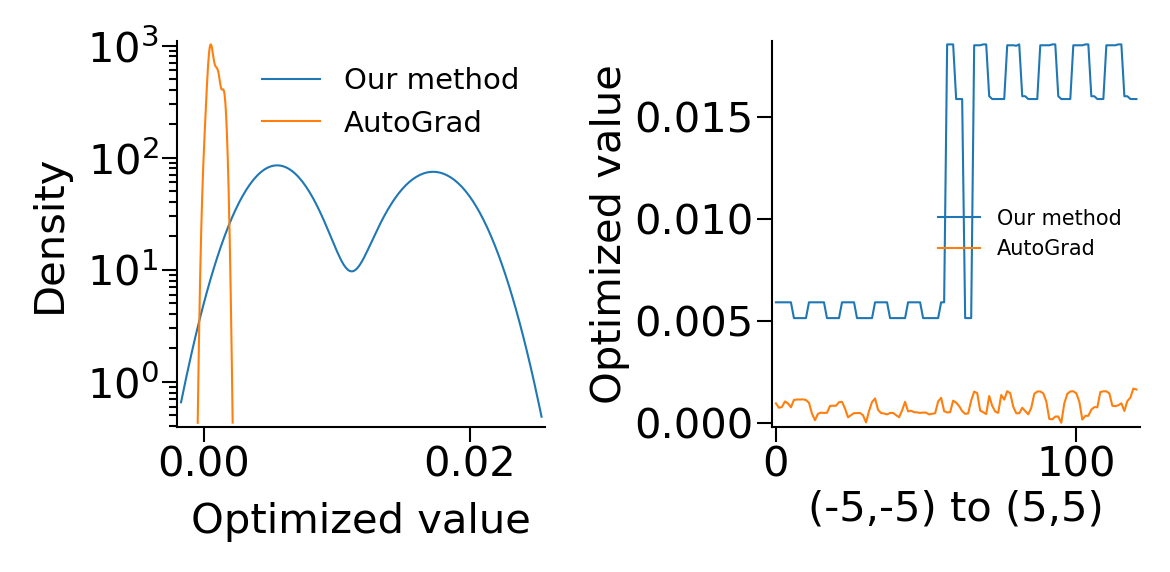

In [61]:
fig, ax = plt.subplots(1, 2, dpi = 300, figsize = (4,2))
fig.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)
import seaborn as sns
# ax[0] = sns.kdeplot(data = df, x = "y_gd_cd", ax=ax[0], label = "GD with Central Difference", lw = 0.5)
ax[0] = sns.kdeplot(data = df, x = "y_new", ax=ax[0], label = "Our method", lw = 0.5)
ax[0] = sns.kdeplot(data = df, x = "y_autograd", ax=ax[0], label = "AutoGrad", lw = 0.5)
ax[0].legend(ncol = 1, fontsize=7, frameon=False)
ax[0].set_xlabel("Optimized value")

# ax[0] = utility.custom_figure_axis(ax[0], rotation=0, fontsize=5)
# 
ax[0] = utility.custom_figure_axis(ax[0], show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 3)

ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_new", ax=ax[1], label = "Our method", lw = 0.5)
ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_autograd", ax=ax[1], label = "AutoGrad", lw = 0.5)
# ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_gd_cd", ax=ax[1], label = "GD with Central Difference", lw = 0.5)

ax[1] = utility.custom_figure_axis(ax[1], show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 3)

# ax[0].legend(ncol = 1, fontsize=9, frameon=False)

ax[1].legend(ncol = 1, fontsize=5, frameon=False)
ax[1].set_ylabel("Optimized value", labelpad=1)
ax[1].set_xlabel("(-5,-5) to (5,5)", labelpad=1)

ax[0].set_yscale("log")
# ax[0].set_xscale("log")

plt.tight_layout()
# plt.savefig("himmelblau_distribution.pdf", dpi = 300, transparent=False, bbox_inches="tight")

In [27]:
df

,X_start,y_start,X_autograd,y_autograd,X_new,y_new,X_gd_cd,y_gd_cd
0,[-5. -5.],250.0,"[-3.7810068130493164, -3.2879791259765625]",0.000953,"[-3.7879812500322787, -3.292446968840093]",0.005903,"[-3.7793107253607543, -3.283186752331547]",2.835498e-11
1,[-5. -4.],116.0,"[-3.783010721206665, -3.2846012115478516]",0.000737,"[-3.787981257984474, -3.2924469685829902]",0.005903,"[-3.7793107276211613, -3.2831867559755166]",2.862718e-11
2,[-5. -3.],130.0,"[-3.783099889755249, -3.284703254699707]",0.000775,"[-3.787981207359472, -3.29244697718905]",0.005903,"[-3.7793107459463724, -3.2831867854840078]",3.088005e-11
3,[-5. -2.],208.0,"[-3.783562183380127, -3.285858392715454]",0.001046,"[-3.78798131463231, -3.292446799535397]",0.005903,"[-3.779309767553547, -3.2831852079301447]",3.004199e-11
4,[-5. -1.],290.0,"[-3.7758452892303467, -3.279423952102661]",0.000953,"[-3.787981308398077, -3.292446815288052]",0.005903,"[-3.7793097823308286, -3.2831852317607053]",2.824204e-11
...,...,...,...,...,...,...,...,...
116,[5. 1.],226.0,"[3.582636594772339, -1.8423892259597778]",0.000578,"[3.0197335250028345, 1.9731765417820952]",0.015999,"[3.000111125031149, 1.9997316327285777]",1.084686e-06
117,[5. 2.],260.0,"[3.0058209896087646, 1.9957363605499268]",0.001068,"[3.0197335048852096, 1.9731766293575674]",0.015999,"[3.0001105050477297, 1.9997331304976156]",1.072614e-06
118,[5. 3.],338.0,"[3.006016254425049, 1.9939653873443604]",0.001233,"[3.0196693184780656, 1.973329961984291]",0.015863,"[2.999890184905845, 2.000265032890954]",1.058349e-06
119,[5. 4.],520.0,"[2.998809814453125, 2.01047420501709]",0.001677,"[3.0196692951803925, 1.9733301356250195]",0.015862,"[2.999891269092099, 2.0002624155851763]",1.037549e-06


In [54]:
df.to_csv("himmelblau.csv", index=False)

##### Define error function

In [29]:
import numpy as np

def compute_error_metrics(series):
    """
    Compute various error metrics with respect to zero.

    Parameters:
    series (array-like): List or NumPy array of numerical values.

    Returns:
    dict: Dictionary containing various error metrics.
    """
    series = np.array(series)

    metrics = {
        "Mean Absolute Error (MAE)": np.mean(np.abs(series)),
        "Root Mean Square Error (RMSE)": np.sqrt(np.mean(series ** 2)),
        # "Mean Squared Error (MSE)": np.mean(series ** 2),
        # "Median Absolute Deviation (MAD)": np.median(np.abs(series)),
        # "Maximum Absolute Error (MaxAE)": np.max(np.abs(series))
    }
    
    return metrics



##### Distance from global minimum at 0 for proposed methoed

In [55]:
# Example usage
error_metrics = compute_error_metrics(df["y_new"])


# Print the results
for metric, value in error_metrics.items():
    print(f"The {metric} distance from global minimum at 0: {value:.3e}")


The Mean Absolute Error (MAE) distance from global minimum at 0: 1.141e-02
The Root Mean Square Error (RMSE) distance from global minimum at 0: 1.287e-02


##### Distance from global minimum at 0  with autograd

In [56]:
# Example usage
error_metrics = compute_error_metrics(df["y_autograd"])


# Print the results
for metric, value in error_metrics.items():
    print(f"The {metric} distance from global minimum at 0: {value:.3e}")


The Mean Absolute Error (MAE) distance from global minimum at 0: 7.962e-04
The Root Mean Square Error (RMSE) distance from global minimum at 0: 8.969e-04


##### Distance from global minimum at 0 for central difference with gradient descent

In [57]:
# Example usage
error_metrics = compute_error_metrics(df["y_gd_cd"])


# Print the results
for metric, value in error_metrics.items():
    print(f"The {metric} distance from global minimum at 0: {value:.3e}")

The Mean Absolute Error (MAE) distance from global minimum at 0: 3.810e-07
The Root Mean Square Error (RMSE) distance from global minimum at 0: 5.748e-07
